In [1]:
from imports import *

In [2]:
galaxy = 'ngc7496'
galaxy_muse = galaxy
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 

narrowband_filter = 'f657n'
instrument_f555w  = 'uvis'
instrument_f65Xn = 'uvis'
instrument_f814w = 'uvis'

# Load files
hdu_muse_f555w  = get_hdu(rootdir, 'muse/%s*_%s_*F555W.fits' %(galaxy_muse.upper(), instrument_f555w.upper()))
hdu_muse_f65Xn  = get_hdu(rootdir, 'muse/%s*_%s_*%s.fits' %(galaxy_muse.upper(), instrument_f65Xn.upper(), narrowband_filter.upper()))
hdu_muse_f814w  = get_hdu(rootdir, 'muse/%s*_%s_*F814W.fits' %(galaxy_muse.upper(), instrument_f814w.upper()))
hdu_muse_stars  = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb    = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse        = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')

hdu_hst_f555w   = get_hdu(rootdir, 'hst/%s*_%s_*f555w*_exp_drc_sci.fits' %(galaxy, instrument_f555w))
hdu_hst_f65Xn   = get_hdu(rootdir, 'hst/%s*_%s_*%s*_exp_drc_sci.fits' %(galaxy, instrument_f65Xn, narrowband_filter))
hdu_hst_f814w   = get_hdu(rootdir, 'hst/%s*_%s_*f814w*_exp_drc_sci.fits' %(galaxy, instrument_f814w))

hdu_hst_f555winv   = get_hdu(rootdir, 'hst/%s*_%s_*f555w*_err_drc_wht.fits' %(galaxy, instrument_f555w))
hdu_hst_f65Xninv   = get_hdu(rootdir, 'hst/%s*_%s_*%s*_err_drc_wht.fits' %(galaxy, instrument_f65Xn, narrowband_filter))
hdu_hst_f814winv   = get_hdu(rootdir, 'hst/%s*_%s_*f814w*_err_drc_wht.fits' %(galaxy, instrument_f814w))
# Get resolution 
hst_res  = 0.07 * u.arcsec
_, file_muse_f65Xn = get_hdu(rootdir, 'muse/%s*_%s_*%s.fits' %(galaxy_muse.upper(), instrument_f65Xn.upper(), narrowband_filter.upper()), return_filename=True)
muse_res = np.float32(file_muse_f65Xn.split('asec')[0].split('-')[-1]) * u.arcsec

# Get filter curve info
bp = get_bandpassinfo(rootdir_bp)

# Cosmic ray thresholds
cr_threshold = 0.9
cr_dilation_iterations = 0

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/muse/NGC7496-0.89asec_UVIS_F555W.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/muse/NGC7496-0.89asec_UVIS_F657N.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/muse/NGC7496-0.89asec_UVIS_F814W.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/muse/NGC7496_starmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/muse/NGC7496_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/muse/NGC7496-0.89asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/hst/ngc7496_uvis_f555w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/hst/ngc7496_uvis_f657n_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/hst/ngc7496_uvis_f814w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/

In [3]:
do_main = True
if do_main: 
    
    # Make paths
    make_paths(rootdir)
    remove_paths(rootdir)

    # # Load errors 
    # hdu_hst_f555werr = conv_inverse_variance_to_error(hdu_hst_f555winv)
    # hdu_hst_f65Xnerr = conv_inverse_variance_to_error(hdu_hst_f65Xninv)
    # hdu_hst_f814werr = conv_inverse_variance_to_error(hdu_hst_f814winv)

    # # Convert units 
    # hdu_hst_f555w = get_nanzeros(hdu_hst_f555w)
    # hdu_hst_f65Xn = get_nanzeros(hdu_hst_f65Xn)
    # hdu_hst_f814w = get_nanzeros(hdu_hst_f814w)

    # hdu_hst_f65Xn = remove_nan_padding(hdu_hst_f65Xn)
    # hdu_hst_f555w = get_regrid(hdu_hst_f555w, hdu_hst_f65Xn)
    # hdu_hst_f814w = get_regrid(hdu_hst_f814w, hdu_hst_f65Xn)
    # hdu_hst_f65Xnerr = get_regrid(hdu_hst_f65Xnerr, hdu_hst_f65Xn)
    # hdu_hst_f555werr = get_regrid(hdu_hst_f555werr, hdu_hst_f65Xn)
    # hdu_hst_f814werr = get_regrid(hdu_hst_f814werr, hdu_hst_f65Xn)

    # hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w = get_covmask(hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w)

    # hdu_hst_f555w = get_electrons_2_ergcm2sA(hdu_hst_f555w)
    # hdu_hst_f65Xn = get_electrons_2_ergcm2sA(hdu_hst_f65Xn)
    # hdu_hst_f814w = get_electrons_2_ergcm2sA(hdu_hst_f814w)

    # hdu_hst_f555werr = get_electrons_2_ergcm2sA(hdu_hst_f555werr, hdu_hst_f555w.header['PHOTFLAM'])
    # hdu_hst_f65Xnerr = get_electrons_2_ergcm2sA(hdu_hst_f65Xnerr, hdu_hst_f65Xn.header['PHOTFLAM'])
    # hdu_hst_f814werr = get_electrons_2_ergcm2sA(hdu_hst_f814werr, hdu_hst_f814w.header['PHOTFLAM'])

    hdu_muse_f555w = get_Jy_2_ergcm2sA(hdu_muse_f555w, bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'])
    hdu_muse_f65Xn = get_Jy_2_ergcm2sA(hdu_muse_f65Xn, bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'])
    hdu_muse_f814w = get_Jy_2_ergcm2sA(hdu_muse_f814w, bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])

    # # Smooth and regrid to MUSE
    # hdu_hst_f555w_sm = get_smooth(hdu_hst_f555w, hst_res, muse_res)
    # hdu_hst_f65Xn_sm = get_smooth(hdu_hst_f65Xn, hst_res, muse_res)
    # hdu_hst_f814w_sm = get_smooth(hdu_hst_f814w, hst_res, muse_res)

    # hdu_hst_f555w_smre = get_regrid(hdu_hst_f555w_sm, hdu_muse_f555w)
    # hdu_hst_f65Xn_smre = get_regrid(hdu_hst_f65Xn_sm, hdu_muse_f65Xn)
    # hdu_hst_f814w_smre = get_regrid(hdu_hst_f814w_sm, hdu_muse_f814w)

    # # Anchor filter flux density to MUSE
    # hdu_hst_f555w_an, hdu_hst_f555w_smrean, fit_f555w = get_anchoring_offset(hdu_muse_f555w, hdu_hst_f555w_smre, hdu_hst_f555w, hdu_muse_stars, 'f555w', rootdir)
    # hdu_hst_f65Xn_an, hdu_hst_f65Xn_smrean, fit_f65Xn = get_anchoring_offset(hdu_muse_f65Xn, hdu_hst_f65Xn_smre, hdu_hst_f65Xn, hdu_muse_stars, narrowband_filter, rootdir)
    # hdu_hst_f814w_an, hdu_hst_f814w_smrean, fit_f814w = get_anchoring_offset(hdu_muse_f814w, hdu_hst_f814w_smre, hdu_hst_f814w, hdu_muse_stars, 'f814w', rootdir)

    # # Make check plots
    # make_plots_diff(hdu_hst_f555w_smrean, hdu_muse_f555w, hdu_muse_stars, fit_f555w, 'f555w', rootdir)
    # make_plots_diff(hdu_hst_f65Xn_smrean, hdu_muse_f65Xn, hdu_muse_stars, fit_f65Xn, narrowband_filter, rootdir)
    # make_plots_diff(hdu_hst_f814w_smrean, hdu_muse_f814w, hdu_muse_stars, fit_f814w, 'f814w', rootdir)

    # # Continuum subtract 
    # output_hst = get_contsub_err(hdu_hst_f65Xn.copy(), 
    #                                 hdu_hst_f555w.copy(), 
    #                                 hdu_hst_f814w.copy(), 
    #                                 hdu_hst_f65Xnerr.copy(),
    #                                 hdu_hst_f555werr.copy(),
    #                                 hdu_hst_f814werr.copy(),
    #                                 bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
    #                                 bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
    #                                 bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])
    # (hdu_hst_halpha, hdu_hst_cont), (hdu_hst_halpha_err, hdu_hst_cont_err) = output_hst

    # output_hst_an = get_contsub_err(hdu_hst_f65Xn_an.copy(), 
    #                                 hdu_hst_f555w_an.copy(), 
    #                                 hdu_hst_f814w_an.copy(), 
    #                                 hdu_hst_f65Xnerr.copy(),
    #                                 hdu_hst_f555werr.copy(),
    #                                 hdu_hst_f814werr.copy(),
    #                                 bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
    #                                 bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
    #                                 bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])       
    # (hdu_hst_an_halpha, hdu_hst_an_cont), (hdu_hst_an_halpha_err, hdu_hst_an_cont_err) = output_hst_an

    # output_muse = get_contsub(hdu_muse_f65Xn.copy(), 
    #                             hdu_muse_f555w.copy(), 
    #                             hdu_muse_f814w.copy(), 
    #                             bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['pivot'], 
    #                             bp['%s_%s' %(instrument_f555w.upper(), 'F555W')]['pivot'], 
    #                             bp['%s_%s' %(instrument_f814w.upper(), 'F814W')]['pivot'])  
    # hdu_muse_halpha, hdu_muse_cont = output_muse


    # # Convert units
    # photbw = bp['%s_%s' %(instrument_f65Xn.upper(), narrowband_filter.upper())]['rectwidth']

    # hdu_hst_halpha        = get_ergcm2sA_2_ergcm2s(hdu_hst_halpha, photbw)
    # hdu_hst_halpha_err    = get_ergcm2sA_2_ergcm2s(hdu_hst_halpha_err, photbw)
    # hdu_hst_cont          = get_ergcm2sA_2_ergcm2s(hdu_hst_cont, photbw)
    # hdu_hst_cont_err      = get_ergcm2sA_2_ergcm2s(hdu_hst_cont_err, photbw)
    # hdu_hst_an_halpha     = get_ergcm2sA_2_ergcm2s(hdu_hst_an_halpha, photbw)
    # hdu_hst_an_halpha_err = get_ergcm2sA_2_ergcm2s(hdu_hst_an_halpha_err, photbw)
    # hdu_hst_an_cont       = get_ergcm2sA_2_ergcm2s(hdu_hst_an_cont, photbw)
    # hdu_hst_an_cont_err   = get_ergcm2sA_2_ergcm2s(hdu_hst_an_cont_err, photbw)
    # hdu_muse_halpha       = get_ergcm2sA_2_ergcm2s(hdu_muse_halpha, photbw)
    # hdu_muse_cont         = get_ergcm2sA_2_ergcm2s(hdu_muse_cont, photbw)
    # hdu_hst_f65Xn_anf     = get_ergcm2sA_2_ergcm2s(hdu_hst_f65Xn_an, photbw)

    # # Make check plots
    # make_plots_muse_comp(hdu_muse_halpha, hdu_muse['HA6562_FLUX'], True, rootdir)
    # make_plots_muse_comp(hdu_muse_halpha, hdu_muse['HA6562_FLUX'], False, rootdir)
    # make_plots_hst_comp(hdu_hst_an_halpha, hdu_hst_halpha, True, rootdir)
    # make_plots_hst_comp(hdu_hst_an_halpha, hdu_hst_halpha, False, rootdir)

    # # Anchor Ha flux to MUSE
    # hdu_hst_halpha_scaled, hdu_muse_halpha_scaled, fit_halpha = get_anchoring_slope(hdu_muse['HA6562_FLUX'], hdu_muse_halpha, hdu_hst_halpha, hdu_muse_neb, 'halpha_neb', rootdir, make_plots=False)
    # hdu_hst_an_halpha_scaled, hdu_muse_an_halpha_scaled, fit_an_halpha = get_anchoring_slope(hdu_muse['HA6562_FLUX'], hdu_muse_halpha, hdu_hst_an_halpha, hdu_muse_neb, 'halpha_an_neb', rootdir)

    # # Correct errors
    # slope_an_halpha = float(fit_an_halpha['slope_bins'].value[0])
    # hdu_hst_halpha_err_scaled = hdu_hst_halpha_err.copy() 
    # hdu_hst_an_halpha_err_scaled = hdu_hst_an_halpha_err.copy()
    # hdu_hst_an_halpha_err_scaled.data = hdu_hst_an_halpha_err_scaled.data * slope_an_halpha

    # # Save fits to table 
    # save_fittables_offsets(fit_f555w, fit_f65Xn, fit_f814w, rootdir)
    # save_fittables_slope(fit_halpha, fit_an_halpha, rootdir)

    # # Make check plots
    # hdu_hst_an_halpha_scaled_sm = get_smooth(hdu_hst_an_halpha_scaled, hst_res, muse_res)
    # hdu_hst_an_halpha_scaled_smre = get_regrid(hdu_hst_an_halpha_scaled_sm, hdu_muse_f555w)
    # make_plots_fluxsubmasks(hdu_muse['HA6562_FLUX'], hdu_hst_an_halpha_scaled_smre, hdu_muse_neb, 'halpha_an_scaled_neb', rootdir)
    # get_anchoring_slope(hdu_muse['HA6562_FLUX'], hdu_hst_an_halpha_scaled_smre, hdu_hst_halpha, hdu_muse_neb, 'halpha_an_scaled_neb', rootdir)

    # # Make check plots histo
    # hdu_muse_neb_re = get_regrid(hdu_muse_neb, hdu_hst_an_halpha_scaled, conserve_flux=False, order='nearest-neighbor')
    # hdu_muse_stars_re = get_regrid(hdu_muse_stars, hdu_hst_an_halpha_scaled, conserve_flux=False, order='nearest-neighbor')
    # make_plots_histogram(hdu_hst_an_halpha_scaled, hdu_muse_neb_re, hdu_muse_stars_re, 'hdu_hst_an_halpha_scaled', rootdir)

    # # Make maps plots
    # make_plots_map(hdu_hst_an_halpha_scaled, galaxy, 'hst_ha', rootdir)

    # Save files

    # write_hdu(hdu_hst_f555w_smre, rootdir, '%s_hst_f555w_smre.fits' %galaxy, compress=True)
    # write_hdu(hdu_hst_f65Xn_smre, rootdir, '%s_hst_%s_smre.fits' %(galaxy, narrowband_filter), compress=True)
    # write_hdu(hdu_hst_f814w_smre, rootdir, '%s_hst_f814w_smre.fits' %galaxy, compress=True)
    # write_hdu(hdu_hst_f555w, rootdir, '%s_hst_f555w.fits' %galaxy, compress=True)
    # write_hdu(hdu_hst_f65Xn, rootdir, '%s_hst_%s.fits' %(galaxy, narrowband_filter), compress=True)
    # write_hdu(hdu_hst_f814w, rootdir, '%s_hst_f814w.fits' %galaxy, compress=True)
    write_hdu(hdu_muse_f555w, rootdir, '%s_muse_f555w.fits' %galaxy, compress=False)
    write_hdu(hdu_muse_f65Xn, rootdir, '%s_muse_%s.fits' %(galaxy, narrowband_filter), compress=False)
    write_hdu(hdu_muse_f814w, rootdir, '%s_muse_f814w.fits' %galaxy, compress=False)
    # write_hdu(hdu_hst_f555w_an, rootdir, '%s_hst_f555w_an.fits' %galaxy, compress=True)
    # write_hdu(hdu_hst_f65Xn_an, rootdir, '%s_hst_%s_an.fits' %(galaxy, narrowband_filter), compress=True)
    # write_hdu(hdu_hst_f814w_an, rootdir, '%s_hst_f814w_an.fits' %galaxy, compress=True)
    # write_hdu(hdu_muse_halpha, rootdir, '%s_muse_%s_contsub.fits' %(galaxy, narrowband_filter), compress=True)
    # write_hdu(hdu_hst_an_halpha, rootdir, '%s_hst_%s_an_contsub.fits' %(galaxy, narrowband_filter), compress=True)
    # write_hdu(hdu_hst_halpha, rootdir, '%s_hst_%s_contsub.fits' %(galaxy, narrowband_filter), compress=True)
    # write_hdu(hdu_muse_cont, rootdir, '%s_muse_%s_cont.fits' %(galaxy, narrowband_filter), compress=True)
    # write_hdu(hdu_hst_an_cont, rootdir, '%s_hst_%s_an_cont.fits' %(galaxy, narrowband_filter), compress=True)
    # write_hdu(hdu_hst_cont, rootdir, '%s_hst_%s_cont.fits' %(galaxy, narrowband_filter), compress=True)
    # write_hdu(hdu_muse['HA6562_FLUX'], rootdir, '%s_muse_ha.fits' %galaxy, compress=True)
    # write_hdu(hdu_hst_an_halpha_scaled, rootdir, '%s_hst_ha.fits' %galaxy)
    # write_hdu(hdu_hst_an_halpha_err_scaled, rootdir, '%s_hst_ha_err.fits' %galaxy)                

[Info] Outputing to the following: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/hst_contsub/
Writing: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/hst_contsub/ngc7496_muse_f555w.fits
Writing: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/hst_contsub/ngc7496_muse_f657n.fits
Writing: /Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/hst_contsub/ngc7496_muse_f814w.fits


In [4]:
import reproject

In [5]:
hdu_muse_f555w_v2 = fits.open('/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/muse/NGC7496-0.89asec_UVIS_F555W_v2.fits')[1]
hdu_muse_f814w_v2 = fits.open('/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc7496/muse/NGC7496-0.89asec_UVIS_F814W_v2.fits')[1]

data_muse_f555w_v2 = reproject.reproject_exact(hdu_muse_f555w_v2, hdu_muse_f555w.header, return_footprint=False)
hdu_muse_f555w_v2 = fits.PrimaryHDU(data_muse_f555w_v2, hdu_muse_f555w.header)

data_muse_f814w_v2 = reproject.reproject_exact(hdu_muse_f814w_v2, hdu_muse_f814w.header, return_footprint=False)
hdu_muse_f814w_v2 = fits.PrimaryHDU(data_muse_f814w_v2, hdu_muse_f814w.header)

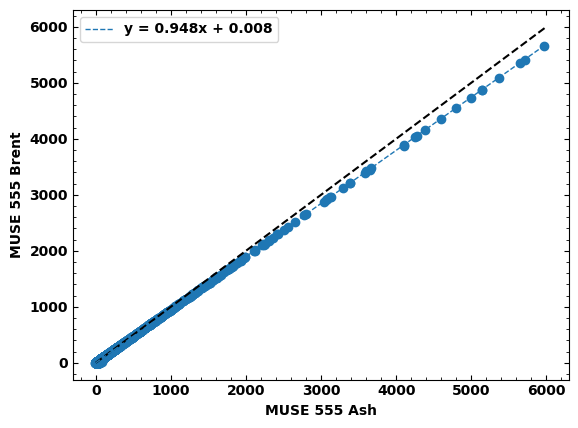

In [ ]:
data_x = hdu_muse_f555w_v2.data.flatten()
data_y = hdu_muse_f555w.data.flatten()

mask_x = ~np.isnan(data_x)
mask_y = ~np.isnan(data_y)

data_x = data_x[mask_x&mask_y]
data_y = data_y[mask_x&mask_y]

fig = plt.figure()
ax = fig.add_subplot(111, grid_kwargs={'hspace':0, 'wspace':0})

ax.scatter(data_x, data_y)
ax.plot([0,6000], [0,6000], ls='--', c='black')

ax.set_xlabel('MUSE 555 Ash')
ax.set_ylabel('MUSE 555 Brent')

fit = np.polyfit(data_x, data_y, 1)
fit_fn = np.poly1d(fit)
fit_x = np.linspace(0, max(data_x))
ax.plot(fit_x, fit_fn(fit_x), 'C0', lw=1, ls='--', label='y = %.3fx + %.3f' %(fit[0], fit[1]))

ax.legend()

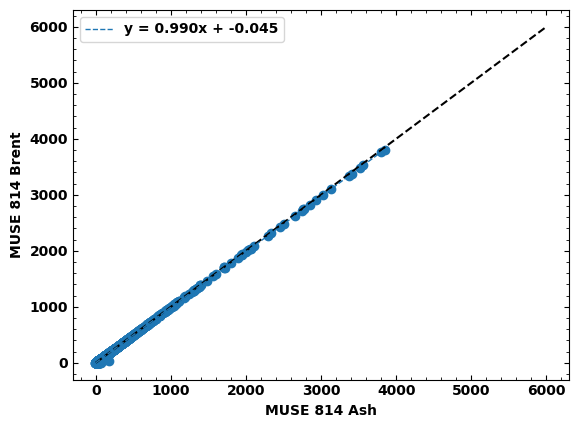

In [11]:
data_x = hdu_muse_f814w_v2.data.flatten()
data_y = hdu_muse_f814w.data.flatten()

mask_x = ~np.isnan(data_x)
mask_y = ~np.isnan(data_y)

data_x = data_x[mask_x&mask_y]
data_y = data_y[mask_x&mask_y]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(data_x, data_y)
ax.plot([0,6000], [0,6000], ls='--', c='black')

ax.set_xlabel('MUSE 814 Ash')
ax.set_ylabel('MUSE 814 Brent')

fit = np.polyfit(data_x, data_y, 1)
fit_fn = np.poly1d(fit)
fit_x = np.linspace(0, max(data_x))
ax.plot(fit_x, fit_fn(fit_x), 'C0', lw=1, ls='--', label='y = %.3fx + %.3f' %(fit[0], fit[1]))

ax.legend()